<a href="https://colab.research.google.com/github/fdac25/brawlhalla/blob/main/usage_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("brawlhalla_matches.csv")
data

,match_id,date,year,tournament_name,event_name,is_official,player_1_name,player_1_smash_id,player_1_region,player_1_pr,player_1_score,player_1_legends,player_2_name,player_2_smash_id,player_2_score,player_2_legends,winner,maps
0,67322836,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,1,"MORDEX, RAYMAN, WU_SHANG, MORDEX",Kyna,135748,3,"TEROS, TEROS, TEROS, TEROS",Player 2,"FortressoftheLions, Apocalypse, DemonIsland, F..."
1,67322820,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,1,"RAYMAN, RAYMAN, TEROS, RAYMAN",yüz,73254,3,", , ,",Player 2,"Apocalypse, Apocalypse, MiamiDome, Apocalypse"
2,67322818,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,"RAYMAN, RAYMAN, RAYMAN",Impala,168635,0,"EMBER, KAYA, EMBER",Player 1,"MiamiDome, MiamiDome, FortressoftheLions"
3,67317310,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,"RAYMAN, RAYMAN, RAYMAN, RAYMAN",megD,142100,1,"VAL, VAL, VAL, VAL",Player 1,"FortressoftheLions, FortressoftheLions, DemonI..."
4,67317302,2023-11-03,2023,Brawlhalla World Championship Expo 2023,1v1,Yes,Zivai,2580895,EU,1,3,Not Reported,Zennnnn,141522,2,Not Reported,Player 1,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12526,55581728,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,Shadra - Baguette senpai,119437,2,Not Reported,Player 2,Not Reported
12527,55581357,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,DanHasCorona,145017,2,Not Reported,Player 2,Not Reported
12528,55581333,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,2,Not Reported,N1K1D,152604,1,Not Reported,Player 1,Not Reported
12529,55581290,2023-01-05,2023,Galaxy Cup: Blizzard,EU 1v1,No,ECHO | Genga199,2254292,EU,62,0,Not Reported,Vocal,119564,-1,Not Reported,Player 1,Not Reported


# Getting Complete List Of All Legends Used

In [3]:
legends = []
for row in data.itertuples(index=True):
  p1legends = list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])) # Grab P1's legends and remove whitespace/empties
  for legend in p1legends: # Iterate through all of P1's legends
    if legend not in legends: # If legend is not already recorded in legends
        legends.append(legend) # Append legend to list

  p2legends = list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])) # Grab P2's legends and remove whitespace/empties
  for legend in p2legends: # Iterate through all of P2's legends
    if legend not in legends: # If legend is not already recorded in legends
        legends.append(legend) # Append legend to list

if "Not Reported" in legends:
  legends.remove("Not Reported") # Remove 'Not Reported' from the list of legends

legends

['MORDEX',
 'RAYMAN',
 'WU_SHANG',
 'TEROS',
 'EMBER',
 'KAYA',
 'VAL',
 'JHALA',
 'VOLKOV',
 'ASURI',
 'JAEYUN',
 'TEZCA',
 'BODVAR',
 'CASPIAN',
 'XULL',
 'KOJI',
 'THEA',
 'ORION',
 'HATTORI',
 'FAIT',
 'LUCIEN',
 'VECTOR',
 'PETRA',
 'BRYNN',
 'MIRAGE',
 'QUEEN_NAI',
 'ULGRIM',
 'DIANA',
 'RAGNIR',
 'DUSK',
 'CASSIDY',
 'LIN_FEI',
 'NIX',
 'MUNIN',
 'JIRO',
 'SCARLET',
 'ZARIEL',
 'LOKI',
 'RED_RAPTOR',
 'EZIO',
 'ARTEMIS',
 'MAGYAR',
 'ISAIAH',
 'SENTINEL',
 'LORD_VRAXX',
 'SIDRA',
 'AZOTH',
 'YUMIKO',
 'THOR',
 'CROSS',
 'ADA',
 'ARCADIA',
 'KOR',
 'ONYX',
 'RENO',
 'GNASH',
 'SIR_ROLAND',
 'MAKO',
 'BARRAZA',
 'THATCH']

# Calculating Win/Usage Of Each Character

(array([19389., 19417., 19448., 19478., 19509., 19539., 19570., 19601.,
        19631., 19662., 19692., 19723.]),
 [Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

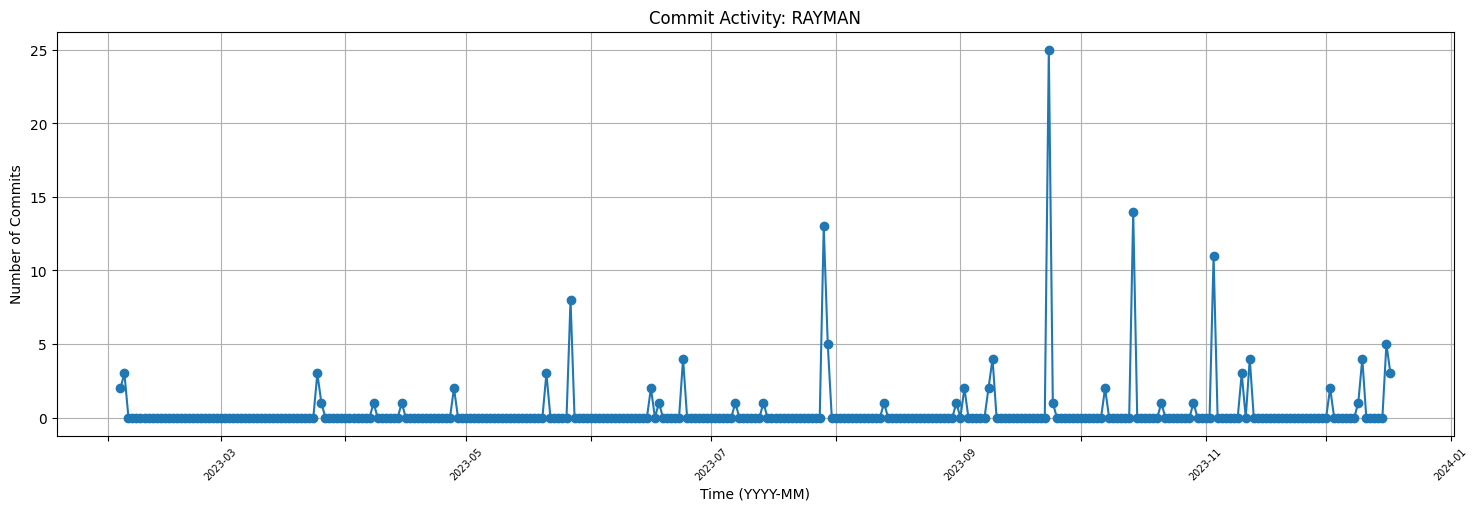

In [25]:
legend = 'RAYMAN'

uses = []

for row in data.itertuples(index=True):
  # Record winner of the match as an integer
  if "1" in row.winner:
    winner = 1
  elif "2" in row.winner:
    winner = 2

  p1legends = list(set(list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])))) # Grab P1's legends and remove whitespace/empties/duplicates
  if legend in p1legends:
    uses.append([row.match_id, row.date, legend, winner == 1])

  p2legends = list(set(list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])))) # Grab P2's legends and remove whitespace/empties/duplicates
  if legend in p2legends:
    uses.append([row.match_id, row.date, legend, winner == 2])

usesdf = pd.DataFrame(uses, columns=['match_id', 'datetime', 'legend', 'won']) # Convert list of lists to dataframe
usesdf['datetime'] = pd.to_datetime(usesdf['datetime']) # Convert datetime column to actual datetime
usesdf.sort_values(by='datetime', inplace=True) # Sort by datetime
usesdf.reset_index(drop=True, inplace=True) # Reset indices

daily_counts = usesdf.groupby('datetime').size().reset_index(name='count')
daily_counts = daily_counts.set_index('datetime')
full_date_range = pd.date_range(start=daily_counts.index.min(), end=daily_counts.index.max(), freq='D')
daily_counts = daily_counts.reindex(full_date_range).fillna(0)
# daily_counts

plt.figure(figsize=(15,5))
# monthly_counts = all_counts[all_counts['project']==project]
plt.plot(daily_counts.index, daily_counts["count"], marker="o", linestyle="-")
plt.xlabel("Time (YYYY-MM)")
plt.ylabel("Number of Commits")
plt.title("Commit Activity: "+legend)
plt.grid(True)
plt.tight_layout()
ax = plt.gca()
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xticks(rotation=45, fontsize=7)

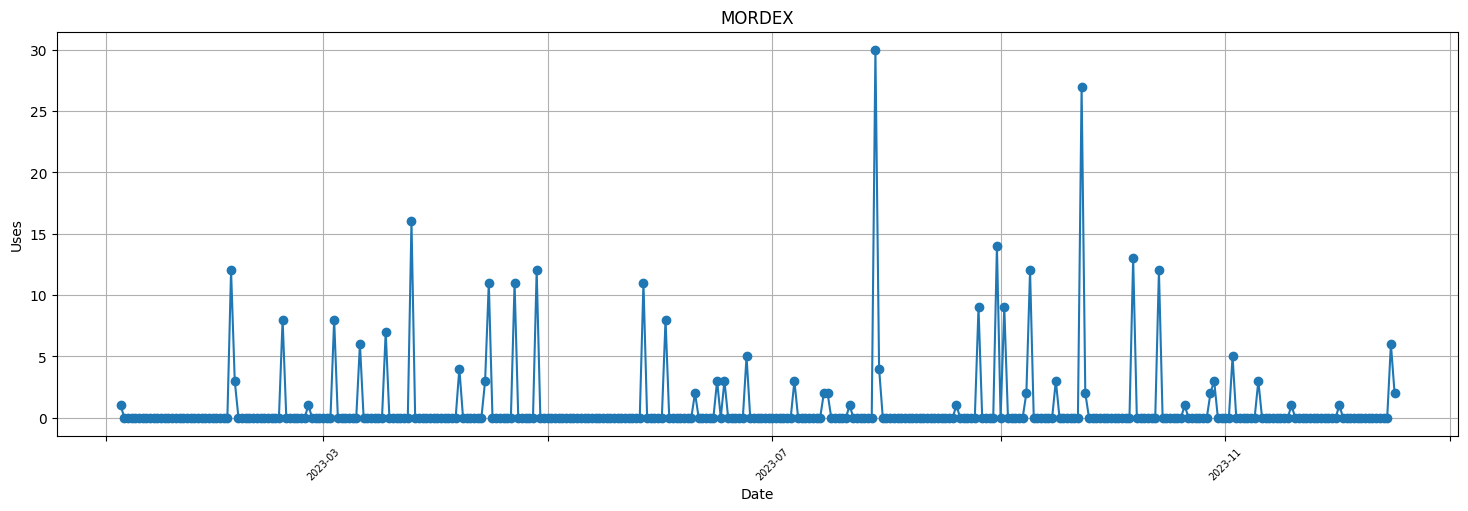

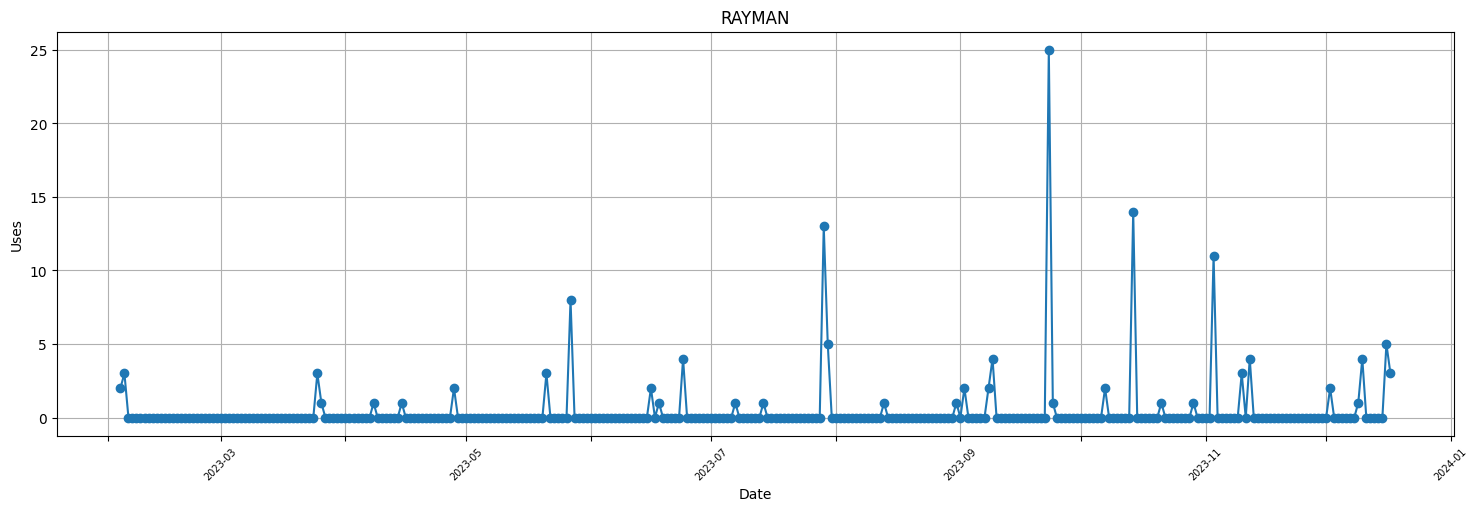

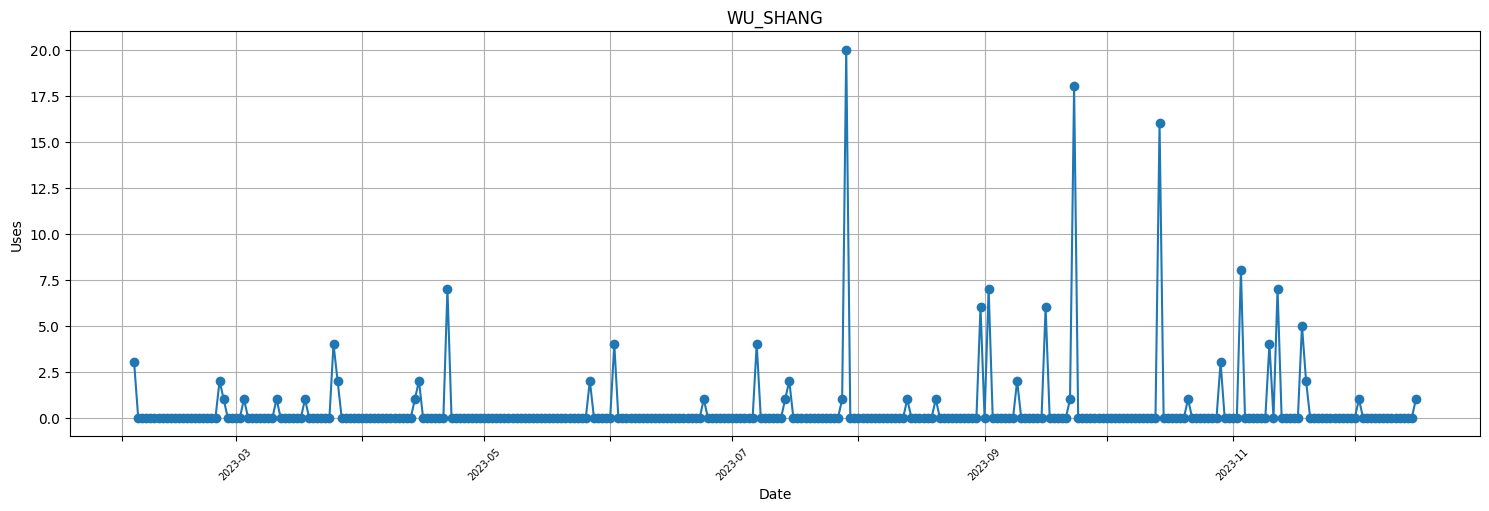

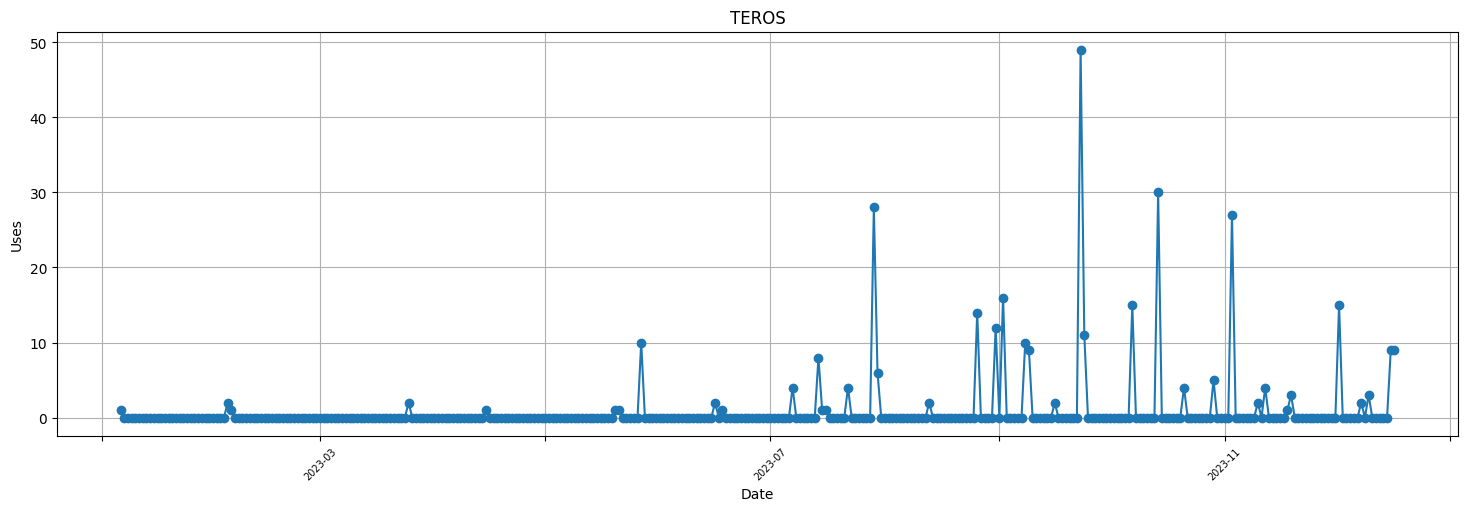

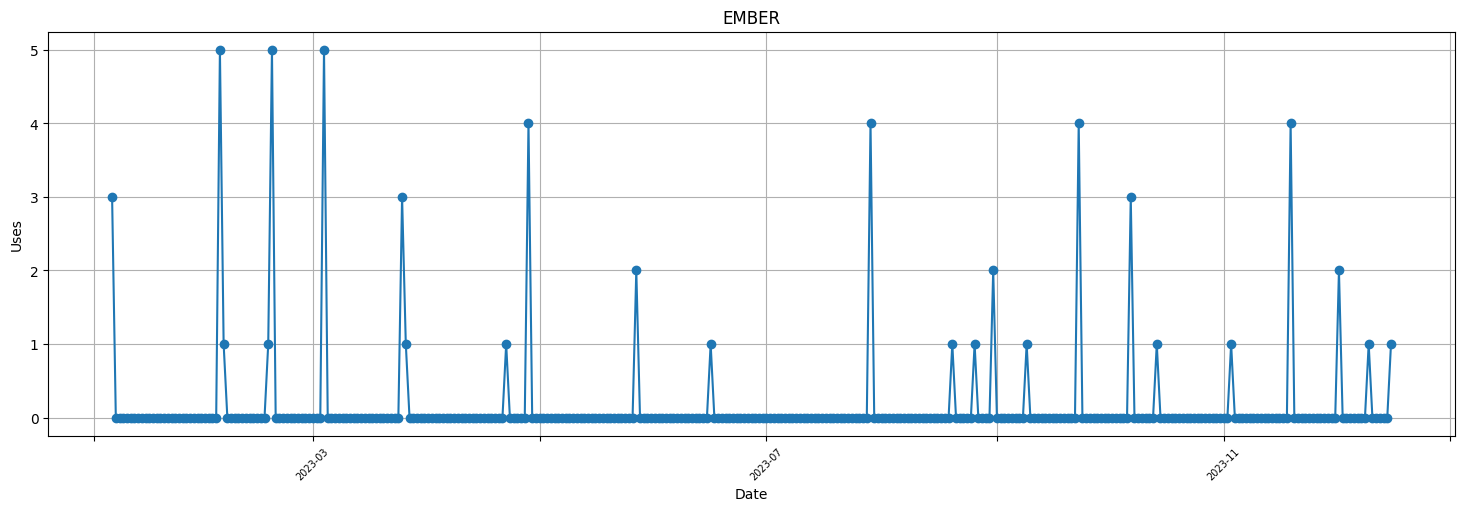

In [27]:
for legend in legends[:5]:
  uses = []
  for row in data.itertuples(index=True):
    # Record winner of the match as an integer
    if "1" in row.winner:
      winner = 1
    elif "2" in row.winner:
      winner = 2

    p1legends = list(set(list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])))) # Grab P1's legends and remove whitespace/empties/duplicates
    if legend in p1legends:
      uses.append([row.match_id, row.date, legend, winner == 1])

    p2legends = list(set(list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])))) # Grab P2's legends and remove whitespace/empties/duplicates
    if legend in p2legends:
      uses.append([row.match_id, row.date, legend, winner == 2])
  usesdf = pd.DataFrame(uses, columns=['match_id', 'datetime', 'legend', 'won']) # Convert list of lists to dataframe
  usesdf['datetime'] = pd.to_datetime(usesdf['datetime']) # Convert datetime column to actual datetime
  usesdf.sort_values(by='datetime', inplace=True) # Sort by datetime
  usesdf.reset_index(drop=True, inplace=True) # Reset indices

  daily_counts = usesdf.groupby('datetime').size().reset_index(name='count')
  daily_counts = daily_counts.set_index('datetime')
  full_date_range = pd.date_range(start=daily_counts.index.min(), end=daily_counts.index.max(), freq='D')
  daily_counts = daily_counts.reindex(full_date_range).fillna(0)
  # daily_counts

  plt.figure(figsize=(15,5))
  # monthly_counts = all_counts[all_counts['project']==project]
  plt.plot(daily_counts.index, daily_counts["count"], marker="o", linestyle="-")
  plt.xlabel("Date")
  plt.ylabel("Uses")
  plt.title(legend)
  plt.grid(True)
  plt.tight_layout()
  ax = plt.gca()
  for label in ax.xaxis.get_ticklabels()[::2]:
      label.set_visible(False)
  plt.xticks(rotation=45, fontsize=7)

In [28]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import plotly.express as px

df = px.data.iris()

def plot_kind(kind):
    plt.figure(figsize=(8, 5))
    if kind == 'scatter':
        plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species_id'])
        plt.title('Sepal Length vs Width')
    elif kind == 'histogram':
        plt.hist(df['petal_length'], bins=20, alpha=0.7)
        plt.title('Petal Length Distribution')
    elif kind == 'box':
        df.boxplot(column='sepal_length', by='species')
        plt.title('Sepal Length by Species')
    plt.show()

interact(plot_kind, kind=widgets.Dropdown(
    options=['scatter', 'histogram', 'box'],
    value='scatter',
    description='Plot Type:'
))

interactive(children=(Dropdown(description='Plot Type:', options=('scatter', 'histogram', 'box'), value='scatt…

<function __main__.plot_kind(kind)>

In [34]:
def plot_legend(legend):
    uses = []
    for row in data.itertuples(index=True):
      # Record winner of the match as an integer
      if "1" in row.winner:
        winner = 1
      elif "2" in row.winner:
        winner = 2

      p1legends = list(set(list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])))) # Grab P1's legends and remove whitespace/empties/duplicates
      if legend in p1legends:
        uses.append([row.match_id, row.date, legend, winner == 1])

      p2legends = list(set(list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])))) # Grab P2's legends and remove whitespace/empties/duplicates
      if legend in p2legends:
        uses.append([row.match_id, row.date, legend, winner == 2])

    usesdf = pd.DataFrame(uses, columns=['match_id', 'datetime', 'legend', 'won']) # Convert list of lists to dataframe
    usesdf['datetime'] = pd.to_datetime(usesdf['datetime']) # Convert datetime column to actual datetime
    usesdf.sort_values(by='datetime', inplace=True) # Sort by datetime
    usesdf.reset_index(drop=True, inplace=True) # Reset indices

    daily_counts = usesdf.groupby('datetime').size().reset_index(name='count')
    daily_counts = daily_counts.set_index('datetime')
    full_date_range = pd.date_range(start=daily_counts.index.min(), end=daily_counts.index.max(), freq='D')
    daily_counts = daily_counts.reindex(full_date_range).fillna(0)

    plt.figure(figsize=(15,5))
    # monthly_counts = all_counts[all_counts['project']==project]
    plt.plot(daily_counts.index, daily_counts["count"], marker="o", linestyle="-")
    plt.xlabel("Date")
    plt.ylabel("Uses")
    plt.title(legend)
    plt.grid(True)
    plt.tight_layout()
    ax = plt.gca()
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.xticks(rotation=45, fontsize=7)
    plt.show()

interact(plot_legend, legend=widgets.Dropdown(
    options=legends,
    value=legends[0],
    description='Legend:'
))

interactive(children=(Dropdown(description='Legend:', options=('MORDEX', 'RAYMAN', 'WU_SHANG', 'TEROS', 'EMBER…

<function __main__.plot_legend(legend)>

In [37]:
@interact(
    legend=legends,
    fill=[True,False],
)
def plot_legend(legend=legends[0], fill=True):
    uses = []
    for row in data.itertuples(index=True):
      # Record winner of the match as an integer
      if "1" in row.winner:
        winner = 1
      elif "2" in row.winner:
        winner = 2

      p1legends = list(set(list(filter(bool, [string.strip() for string in row.player_1_legends.split(",")])))) # Grab P1's legends and remove whitespace/empties/duplicates
      if legend in p1legends:
        uses.append([row.match_id, row.date, legend, winner == 1])

      p2legends = list(set(list(filter(bool, [string.strip() for string in row.player_2_legends.split(",")])))) # Grab P2's legends and remove whitespace/empties/duplicates
      if legend in p2legends:
        uses.append([row.match_id, row.date, legend, winner == 2])

    usesdf = pd.DataFrame(uses, columns=['match_id', 'datetime', 'legend', 'won']) # Convert list of lists to dataframe
    usesdf['datetime'] = pd.to_datetime(usesdf['datetime']) # Convert datetime column to actual datetime
    usesdf.sort_values(by='datetime', inplace=True) # Sort by datetime
    usesdf.reset_index(drop=True, inplace=True) # Reset indices

    daily_counts = usesdf.groupby('datetime').size().reset_index(name='count')
    daily_counts = daily_counts.set_index('datetime')

    if fill:
      full_date_range = pd.date_range(start=daily_counts.index.min(), end=daily_counts.index.max(), freq='D')
      daily_counts = daily_counts.reindex(full_date_range).fillna(0)

    plt.figure(figsize=(15,5))
    # monthly_counts = all_counts[all_counts['project']==project]
    plt.plot(daily_counts.index, daily_counts["count"], marker="o", linestyle="-")
    plt.xlabel("Date")
    plt.ylabel("Uses")
    plt.title(legend)
    plt.grid(True)
    plt.tight_layout()
    ax = plt.gca()
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.xticks(rotation=45, fontsize=7)
    plt.show()

interactive(children=(Dropdown(description='legend', options=('MORDEX', 'RAYMAN', 'WU_SHANG', 'TEROS', 'EMBER'…